## 6.5 Machine Learning Part 2: Clustering

### This script contains the following:

#### 1. Importing libraries and data and renaming columns
#### 2. The elbow technique
#### 3. k-means clustering
#### 4. Insights

### 1. Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl 
import scipy
from scipy import stats

In [2]:
%matplotlib inline

In [3]:
# Define path
path = r'/Users/sydneyhoy/Documents/Data Immersion/Achievement 6/World Life Expectancy Analysis'

In [4]:
# Import dataset
life_expectancy = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'life_expectancy_clean.csv'))

In [5]:
life_expectancy.shape

(2700, 20)

In [6]:
life_expectancy.head()

,Unnamed: 0,country,year,status,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,Measles,BMI,under-five deaths,polio_immunizations,Diphtheria,HIV/AIDS_deaths,GDP,population,thinness 1-19 years,thinness_5-9_years,income_composition_of_resources
0,0,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,327582.0,17.5,17.5,0.476
1,1,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,31731688.0,17.7,17.7,0.470
2,2,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,3696958.0,17.9,18.0,0.463
3,3,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,2978599.0,18.2,18.2,0.454
4,4,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,1989,16.7,102,66,66,0.1,553.328940,2883167.0,18.4,18.4,0.448


In [7]:
life_expectancy.columns

Index(['Unnamed: 0', 'country', 'year', 'status', 'life_expectancy',
       'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure',
       'Measles ', 'BMI', 'under-five deaths ', 'polio_immunizations',
       'Diphtheria ', 'HIV/AIDS_deaths', 'GDP', 'population',
       ' thinness  1-19 years', 'thinness_5-9_years',
       'income_composition_of_resources'],
      dtype='object')

In [8]:
df = pd.DataFrame(life_expectancy)

In [9]:
life_expectancy = life_expectancy.drop(columns = ['Unnamed: 0', 'country', 'year', 'status'])

### 2. The elbow technique

In [10]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [11]:
score = [kmeans[i].fit(life_expectancy).score(life_expectancy) for i in range(len(kmeans))]

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` wi

In [12]:
score

[-9.981915950148387e+18,
 -3.1751659659708426e+18,
 -1.0898413422050264e+18,
 -4.3231718943030925e+17,
 -2.407726193534003e+17,
 -1.4051734201957304e+17,
 -1.0388531071121405e+17,
 -8.072042714306426e+16,
 -6.533389265590885e+16]

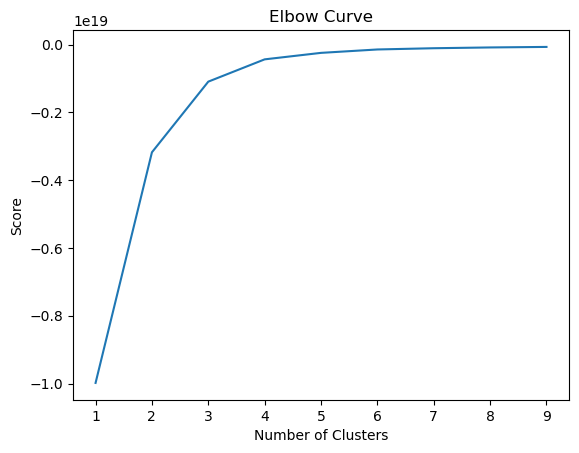

In [13]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In the elbow graph it rises a little and then starts to level out after 4 which tells me 4 would be the optimal count of clusters.

## 3. k-means clustering

In [14]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4) 

In [15]:
# Fit the k-means object to the data.

kmeans.fit(life_expectancy)

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [16]:
life_expectancy['clusters'] = kmeans.fit_predict(life_expectancy)

/Users/sydneyhoy/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [17]:
life_expectancy['clusters'].value_counts()

clusters
1    2429
0     230
3      36
2       5
Name: count, dtype: int64

In [18]:
life_expectancy.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,Measles,BMI,under-five deaths,polio_immunizations,Diphtheria,HIV/AIDS_deaths,GDP,population,thinness 1-19 years,thinness_5-9_years,income_composition_of_resources,clusters
0,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,327582.0,17.5,17.5,0.476,1
1,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,1
2,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,1
3,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,1
4,58.8,279,74,0.01,79.679367,1989,16.7,102,66,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,1


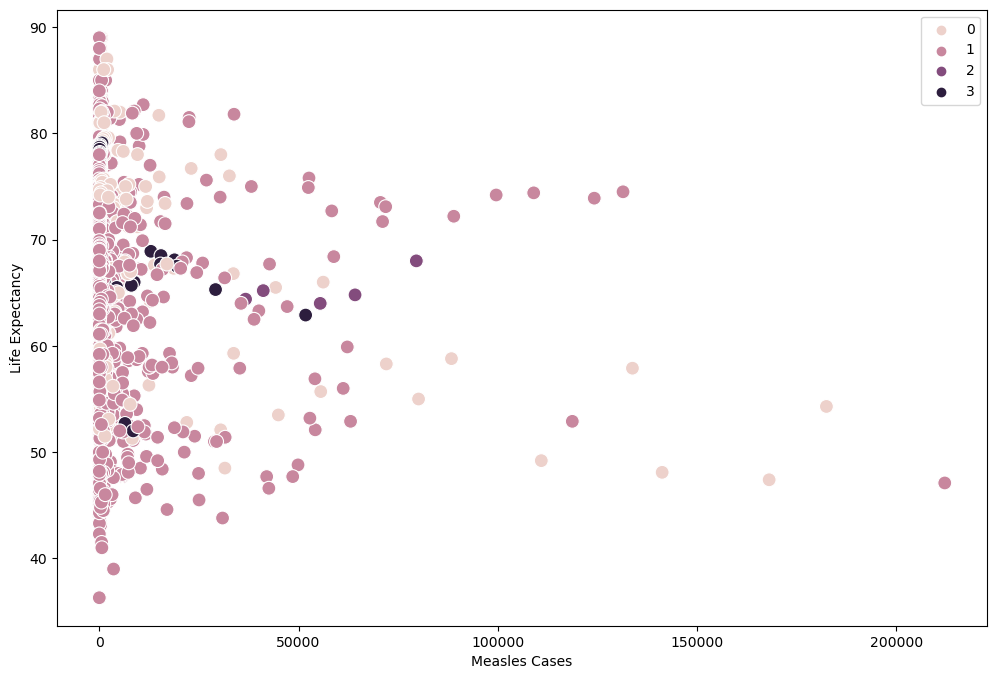

In [19]:
# Plot the clusters Measles  vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Measles '], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Measles Cases') 
plt.ylabel('Life Expectancy') 
plt.show()

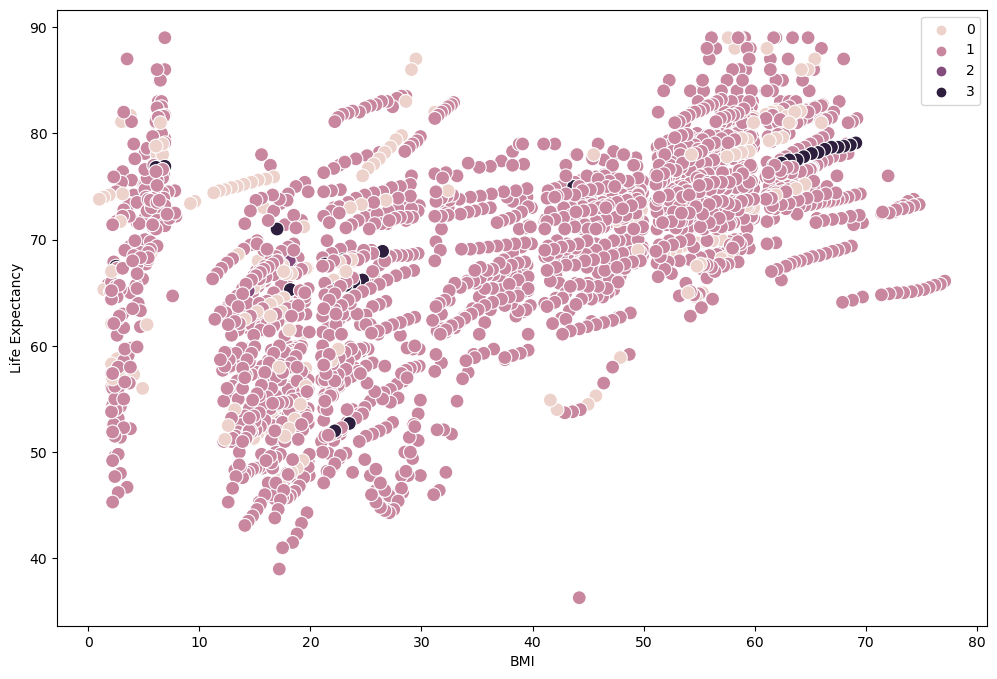

In [20]:
# Plot the clusters BMI vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['BMI'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('BMI') 
plt.ylabel('Life Expectancy') 
plt.show()

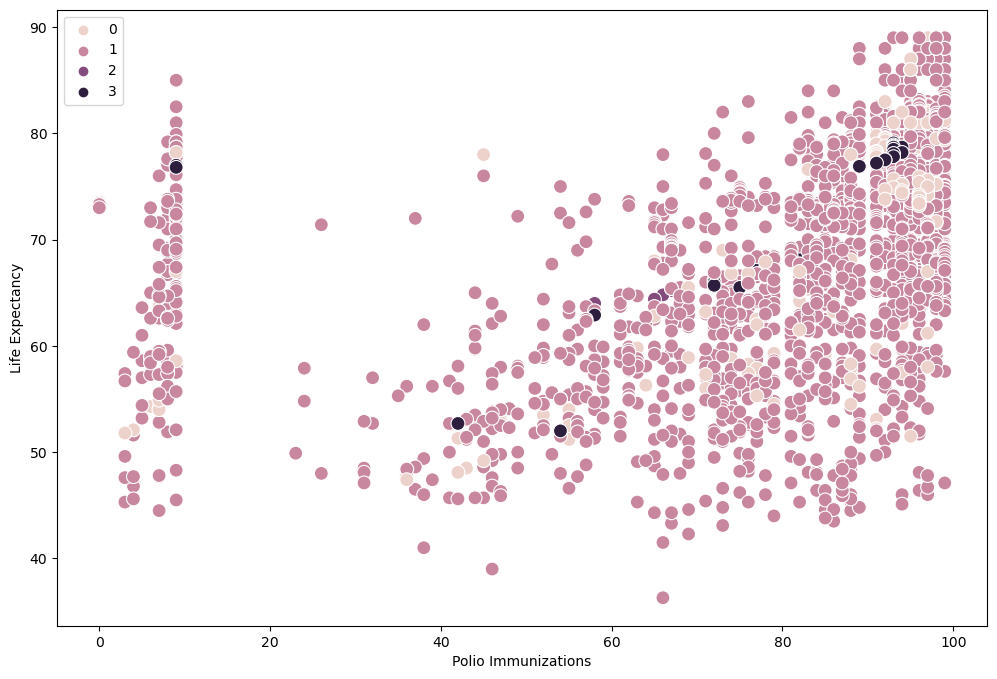

In [21]:
# Plot the clusters polio immunizations vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['polio_immunizations'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Polio Immunizations') 
plt.ylabel('Life Expectancy') 
plt.show()

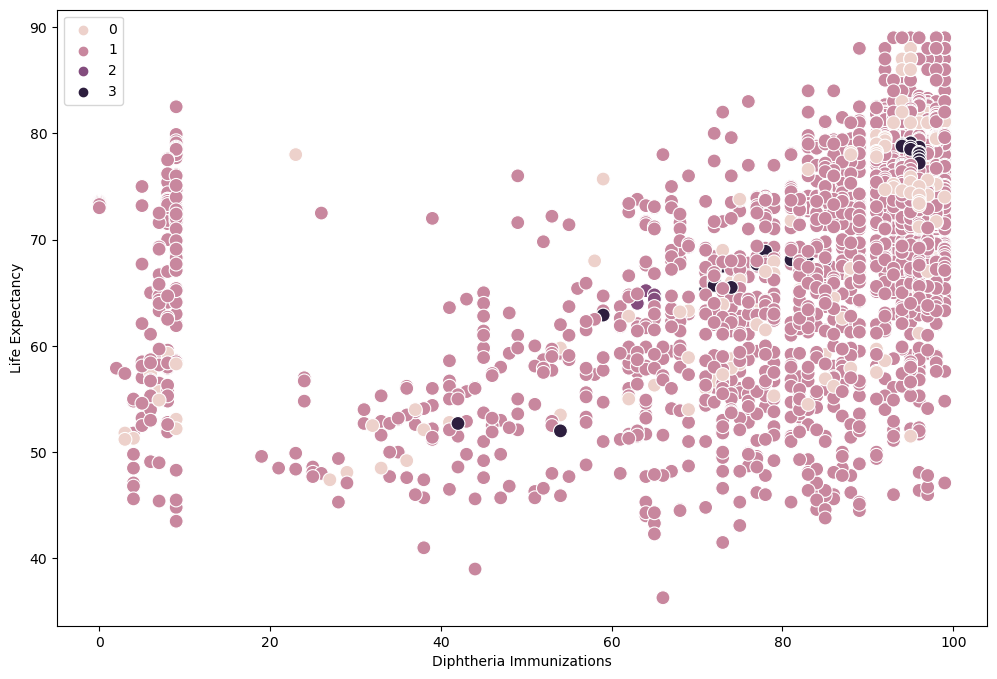

In [22]:
# Plot the clusters diphtheria vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Diphtheria '], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Diphtheria Immunizations') 
plt.ylabel('Life Expectancy') 
plt.show()

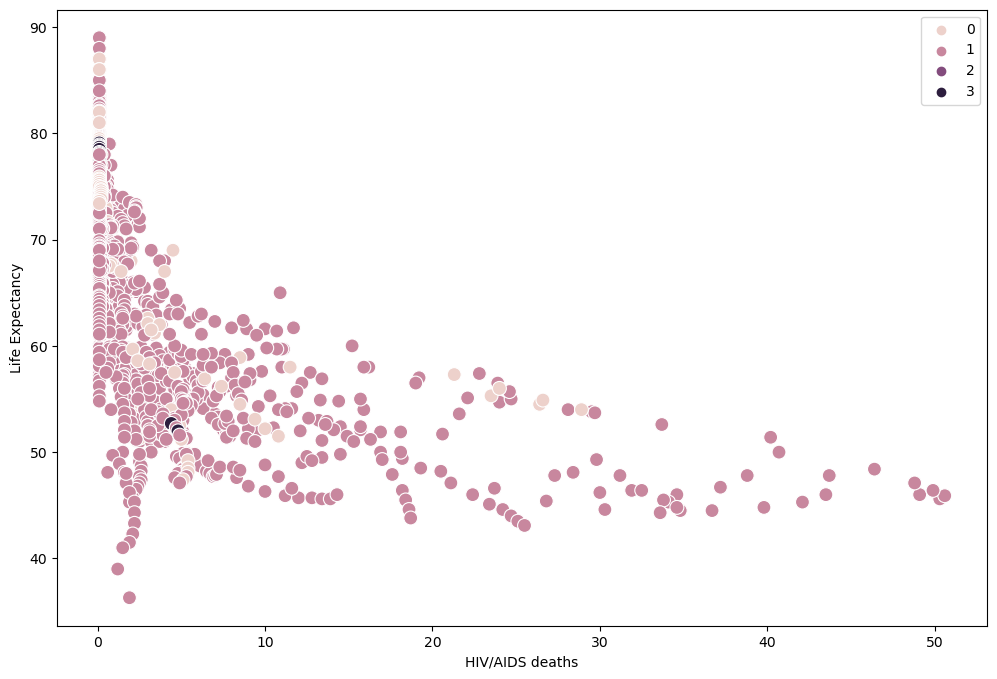

In [23]:
# Plot the clusters HIV/AIDS deaths vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['HIV/AIDS_deaths'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('HIV/AIDS deaths') 
plt.ylabel('Life Expectancy') 
plt.show()

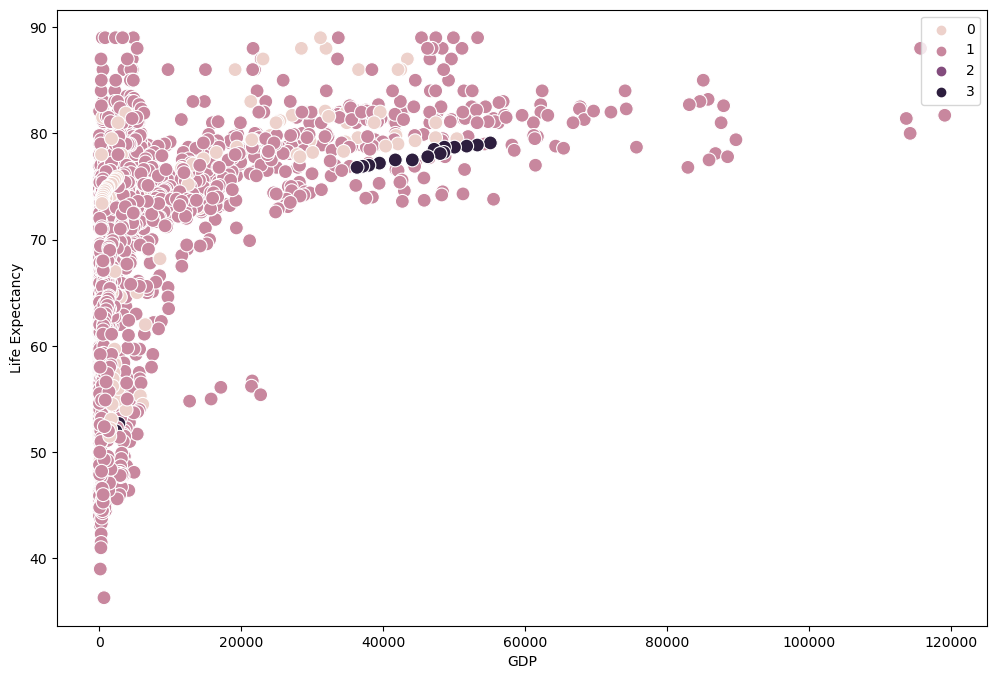

In [24]:
# Plot the clusters GDP vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['GDP'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('GDP') 
plt.ylabel('Life Expectancy') 
plt.show()

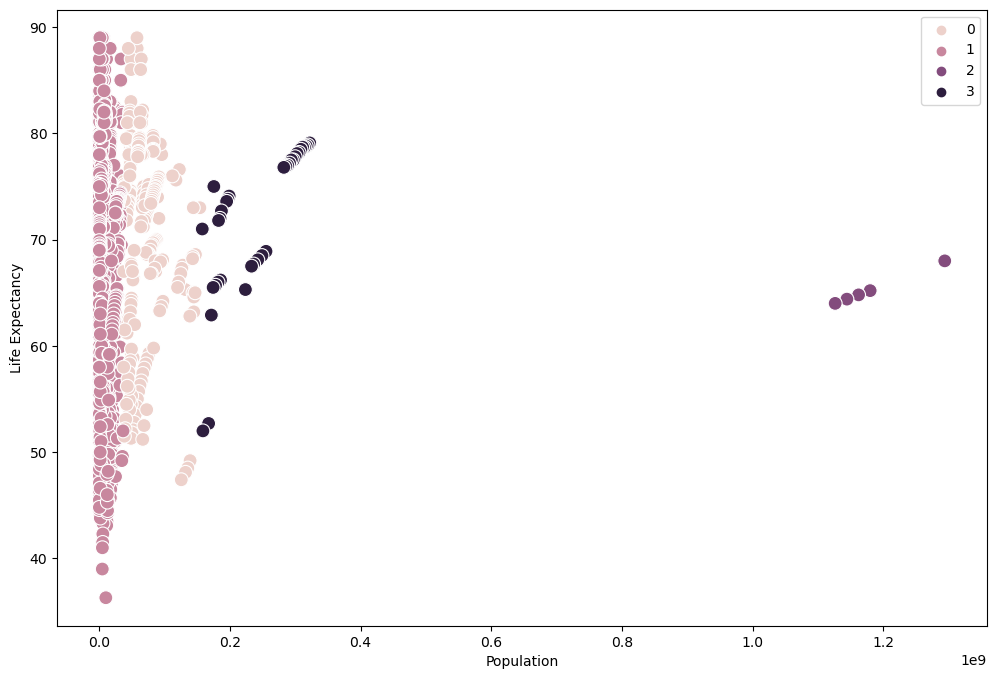

In [25]:
# Plot the clusters population vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['population'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Population') 
plt.ylabel('Life Expectancy') 
plt.show()

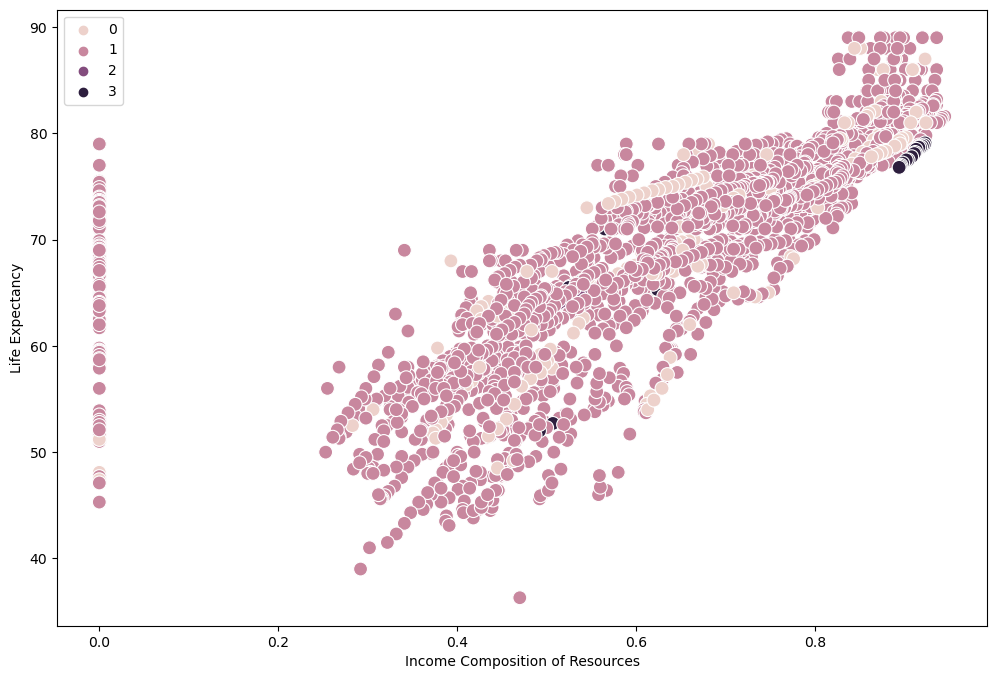

In [26]:
# Plot the clusters income composition of resources vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['income_composition_of_resources'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Income Composition of Resources') 
plt.ylabel('Life Expectancy') 
plt.show()

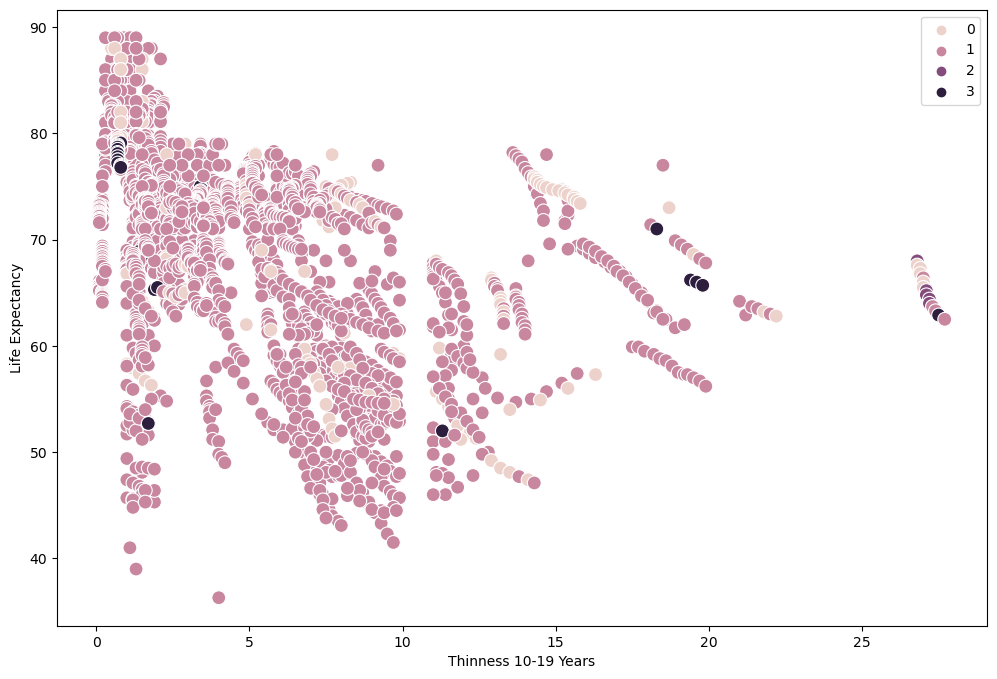

In [27]:
# Plot the clusters thinness 10-19 years vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df[' thinness  1-19 years'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Thinness 10-19 Years') 
plt.ylabel('Life Expectancy') 
plt.show()

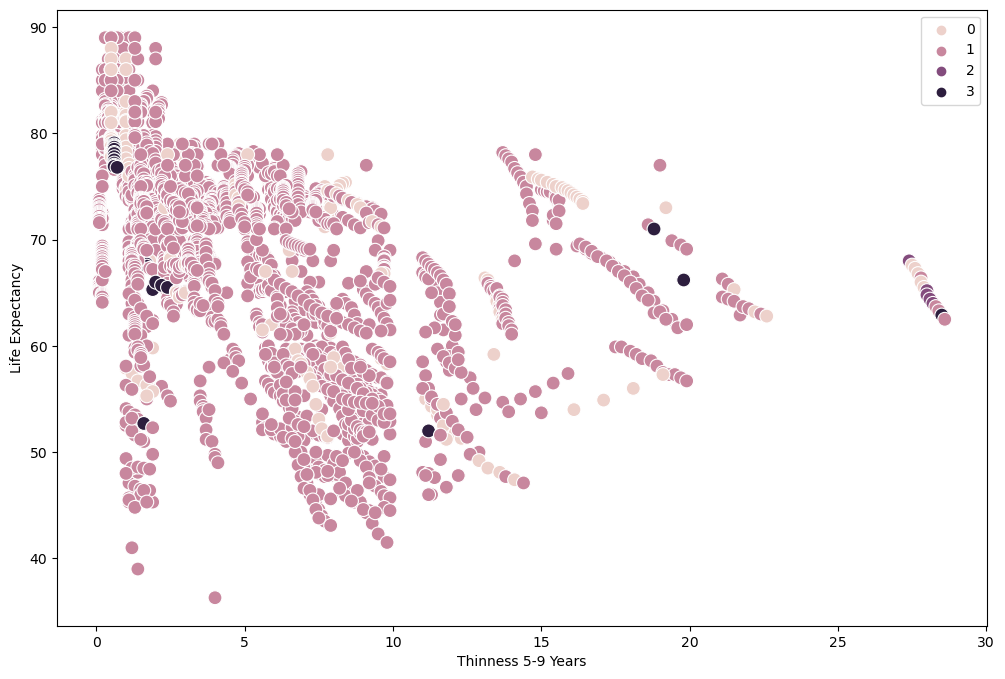

In [28]:
# Plot the clusters thinness 5-9 years vs life expectancy

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['thinness_5-9_years'], y=df['life_expectancy'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Thinness 5-9 Years') 
plt.ylabel('Life Expectancy') 
plt.show()

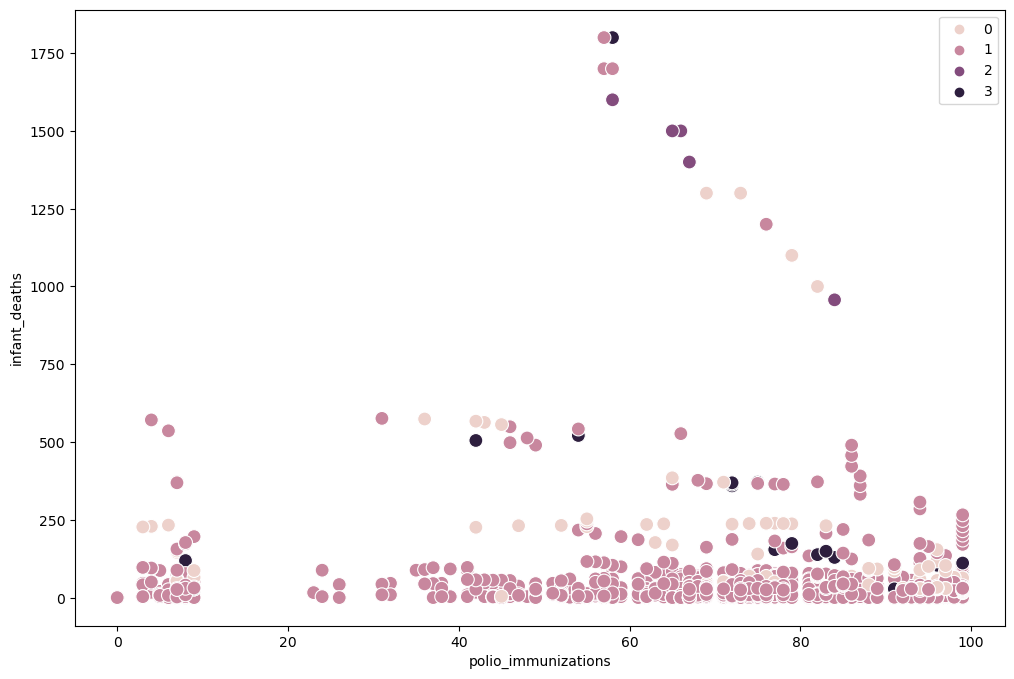

In [29]:
# Plot the clusters polio immunizations vs infant deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['polio_immunizations'], y=df['infant_deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('polio_immunizations') 
plt.ylabel('infant_deaths') 
plt.show()

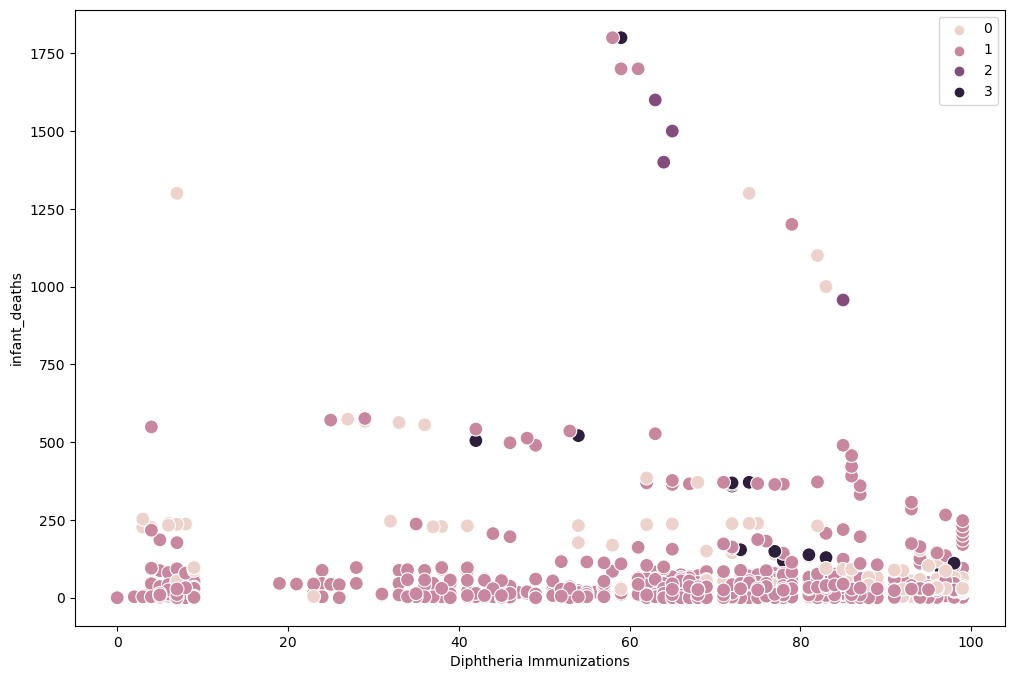

In [30]:
# Plot the clusters diphtheria vs infant deaths

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Diphtheria '], y=df['infant_deaths'], hue=kmeans.labels_, s=100) 
ax.grid(False) 
plt.xlabel('Diphtheria Immunizations') 
plt.ylabel('infant_deaths') 
plt.show()

In the majority of these scatter plots the clusters seem random and don't make much sense, so more exploration is needed in most areas. The population vs life expectancy had a good cluster structure where cluster '0' were all in the lower population and a large variation of life expectancy. The next cluster '3' was a bit higher population and higher average life expectancy. The next cluster '2' showed a bit higher population and a life expectancy higher but starting to level out in the middle of life expectancy. Then cluster '1' was the highest life expectancy and clustered right in the middle of life expectancy. This shows me that life expectancy varies a lot depending on population but as the population rises life expectancy averages out.

In [31]:
life_expectancy.loc[life_expectancy['clusters'] == 3, 'cluster'] = 'dark purple'
life_expectancy.loc[life_expectancy['clusters'] == 2, 'cluster'] = 'purple'
life_expectancy.loc[life_expectancy['clusters'] == 1, 'cluster'] = 'dark pink'
life_expectancy.loc[life_expectancy['clusters'] == 0, 'cluster'] = 'pink'

In [32]:
# calculate the descriptive statistics of the clusters
life_expectancy.groupby('cluster').agg({'life_expectancy':['mean', 'median'], 
                         'infant_deaths':['mean', 'median'], 
                         'percentage_expenditure':['mean', 'median'],
                         'Measles ':['mean', 'median'], 
                         'BMI':['mean', 'median'],
                         'income_composition_of_resources':['mean', 'median']})

life_expectancy        infant_deaths          \
                       mean median          mean  median   
cluster                                                    
dark pink         69.123466   72.1     20.467682     2.0   
dark purple       71.963889   73.7    171.388889    66.0   
pink              70.603478   73.3     85.617391    28.0   
purple            65.280000   64.8   1391.400000  1500.0   

            percentage_expenditure                 Measles            \
                              mean     median          mean   median   
cluster                                                                
dark pink               836.923490  96.858588   1798.615068     10.0   
dark purple             128.595966  21.383553   5635.000000    128.0   
pink                    555.891598   9.021489   8062.017391    552.5   
purple                   31.492676  27.338009  55409.200000  55443.0   

                   BMI        income_composition_of_resources          
                  mean median                            mean  median  
cluster                                                                
dark pink    38.346151   43.6                        0.621530  0.6780  
dark purple  41.413889   46.5                        0.740361  0.7065  
pink         34.825652   28.4                        0.665596  0.6720  
purple       14.580000   13.9                        0.546600  0.5360

In [33]:
# calculate the descriptive statistics of the clusters (I separated into two for easier comparison)
life_expectancy.groupby('cluster').agg({'polio_immunizations':['mean', 'median'],
                         'Diphtheria ':['mean', 'median'],
                         'GDP':['mean', 'median'],
                         'population':['mean', 'median'],
                         ' thinness  1-19 years':['mean', 'median'],
                         'thinness_5-9_years':['mean', 'median'],
                         'HIV/AIDS_deaths':['mean', 'median']})

polio_immunizations        Diphtheria                   GDP  \
                           mean median        mean median          mean   
cluster                                                                   
dark pink             82.542198   93.0   82.198024   92.0   7439.036560   
dark purple           79.638889   92.0   86.750000   94.5  20890.275303   
pink                  85.460870   95.0   83.873913   94.0   8469.174898   
purple                68.000000   66.0   68.400000   65.0    636.536468   

                            population                thinness  1-19 years  \
                  median          mean        median                  mean   
cluster                                                                      
dark pink    1849.639110  4.710259e+06  1.396861e+06              4.694195   
dark purple  6146.252030  2.408702e+08  2.393417e+08              4.508333   
pink         2175.505000  6.843827e+07  6.296970e+07              6.160870   
purple        621.318377  1.181155e+09  1.161978e+09             27.080000   

                   thinness_5-9_years        HIV/AIDS_deaths         
            median               mean median            mean median  
cluster                                                              
dark pink     3.40           4.723219   3.40        1.870811    0.1  
dark purple   1.65           3.516667   1.55        0.377778    0.1  
pink          3.25           6.358696   3.40        1.587391    0.1  
purple       27.10          27.940000  28.00        0.280000    0.3

In [34]:
life_expectancy.columns

Index(['life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol',
       'percentage_expenditure', 'Measles ', 'BMI', 'under-five deaths ',
       'polio_immunizations', 'Diphtheria ', 'HIV/AIDS_deaths', 'GDP',
       'population', ' thinness  1-19 years', 'thinness_5-9_years',
       'income_composition_of_resources', 'clusters', 'cluster'],
      dtype='object')

In [36]:
life_expectancy.head()

,life_expectancy,adult_mortality,infant_deaths,alcohol,percentage_expenditure,Measles,BMI,under-five deaths,polio_immunizations,Diphtheria,HIV/AIDS_deaths,GDP,population,thinness 1-19 years,thinness_5-9_years,income_composition_of_resources,clusters,cluster
0,59.9,271,64,0.01,73.523582,492,18.6,86,58,62,0.1,612.696514,327582.0,17.5,17.5,0.476,1,dark pink
1,59.9,268,66,0.01,73.219243,430,18.1,89,62,64,0.1,631.744976,31731688.0,17.7,17.7,0.470,1,dark pink
2,59.5,272,69,0.01,78.184215,2787,17.6,93,67,67,0.1,669.959000,3696958.0,17.9,18.0,0.463,1,dark pink
3,59.2,275,71,0.01,7.097109,3013,17.2,97,68,68,0.1,63.537231,2978599.0,18.2,18.2,0.454,1,dark pink
4,58.8,279,74,0.01,79.679367,1989,16.7,102,66,66,0.1,553.328940,2883167.0,18.4,18.4,0.448,1,dark pink


In [37]:
life_expectancy.to_csv(os.path.join(path, '02 Data','Prepared', 'life_expectancy_clusters.csv'))

## 4. Insights

The dark pink being the highest rated cluster shows the lowest life expectancy which tells us that the higher numbers for the categories infant deaths, measles cases, and thinness, and the lower number in the categories percentage expenditure, BMI, immunizations, and GDP contribute to this lower life expectancy. As life expectancy increases with each cluster we see a rise or fall in the averages depedning on the variables. These clusters also show that population does not matter as the averages are random throughout the clusters. 

These results show that while there is no obvious correlation when in comes to scatterplots, categorical plots or other forms of exploratory analysis we have explored, these factors do play a role in the life expectancy. This is useful because thus far there have not been many useful insights drawn from this data, but the cluster have shown that there is meaningful use to these statatistics that had not been uncovered before.